In [2]:
import os
import argparse
import sys
import json
import pandas as pd
import numpy as np
import nltk
import time
from sklearn.metrics import confusion_matrix
from nltk import word_tokenize
from pandas.core.indexes.base import Index
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
import random
#import somef
import seaborn as sns
#from imblearn.over_sampling import SMOTE

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ciuciu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_train_all = pd.read_csv('dataset/train_all.csv', sep=';')
df_train_all_x = df_train_all['Text']
for i in range(len(df_train_all_x)):
    df_train_all_x[i] = df_train_all_x[i].replace('\n', ' ').replace(',', ' ').lower()
df_train_all_y = df_train_all['Label']
print(df_train_all.shape)

(25828, 3)


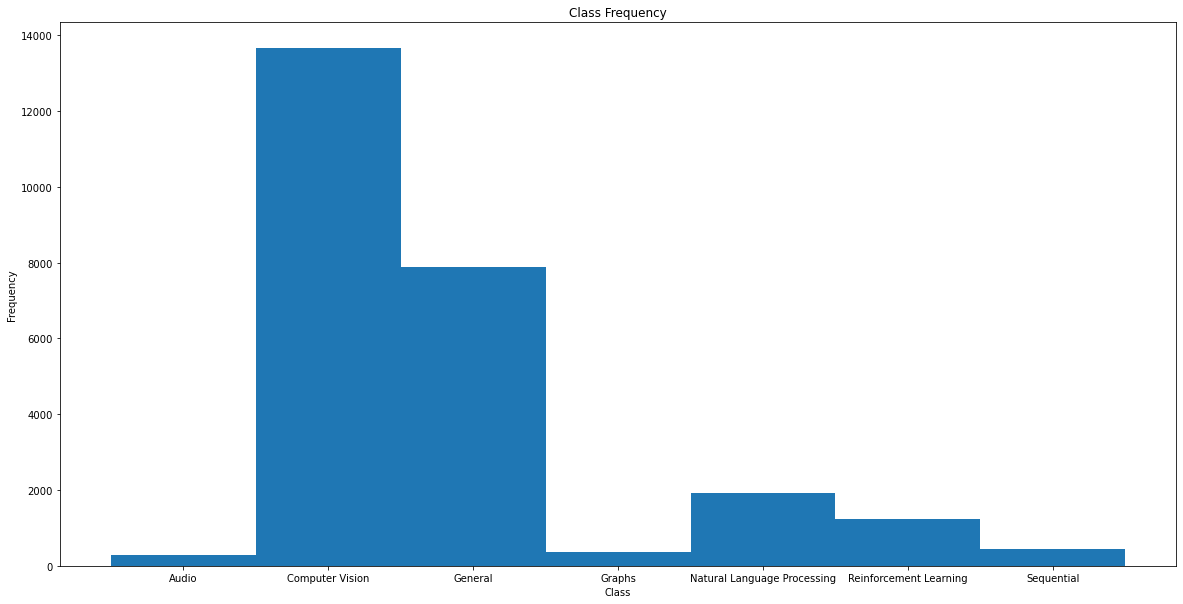

In [4]:
unique, counts = np.unique(df_train_all_y, return_counts=True)
plt.figure(figsize=(20,10))
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Nice version

In [5]:
class DataframeContainer:
    def __init__(self, name):
        self.name = name
        self.dataframe = pd.read_csv('dataset/train_all.csv', sep=';')
        
    def filter_dataframe(self):
        count = 0
        for ind, row in self.dataframe.iterrows():
            if self.name != str(row['Label']):
                count += 1
                row['Label'] = 'General'
                row['Text'] = row['Text'].replace('\n', ' ').replace(',', ' ').lower()
        print(f'{self.name} filtered {count} rows')  

    def separate_x_y(self):
        self.df_X, self.df_y = self.dataframe['Text'], self.dataframe['Label']
        unique, counts = np.unique(self.df_y , return_counts=True)
        plt.bar(unique, counts, 1)
        plt.title('Class Frequency')
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.show()
        
    def split_train_test(self, test_size = 0.3, random_state = 42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.df_X, self.df_y, test_size=test_size, random_state=random_state, stratify=self.df_y)

    def clf_fit(self):
        self.clf = Pipeline([
            ('vectorizer', CountVectorizer(analyzer="word",
                                           tokenizer=word_tokenize,
                                           max_features=None,
                                           lowercase=True)),
            #('smote', SMOTE(random_state=42)),
            ('classifier', LinearSVC(random_state=42))
        ])
        self.clf.fit(self.X_train, self.y_train)
        print(f'{self.name} clf fit done')
        
    def predict(self):
        self.y_pred = self.clf.predict(self.X_test)

    def confusion_matrix(self):
        y_unique = self.y_test.unique()
        cm = confusion_matrix(self.y_test, self.y_pred, labels=y_unique)
        cm_df = pd.DataFrame(cm, index = [y_unique], columns = [y_unique])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True, fmt='d')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        plt.show()
        print(f"Accuracy {self.name} : {metrics.accuracy_score(self.y_test, self.y_pred)}")
    def save_pickle(self):
        filename = self.name + '.sav'
        pickle.dump(self.clf, open(filename, 'wb'))

Audio filtered 25542 rows


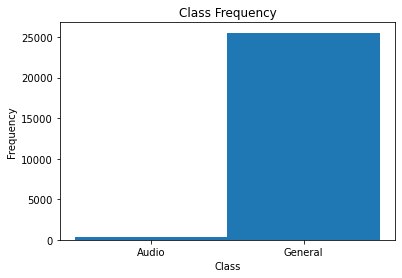

Computer Vision filtered 12164 rows


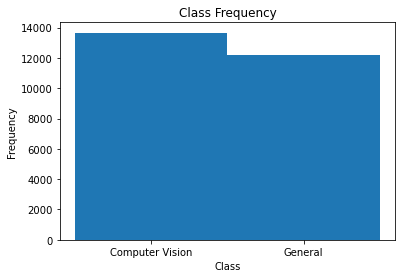

Graphs filtered 25465 rows


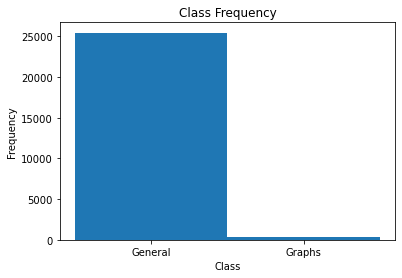

Natural Language Processing filtered 23900 rows


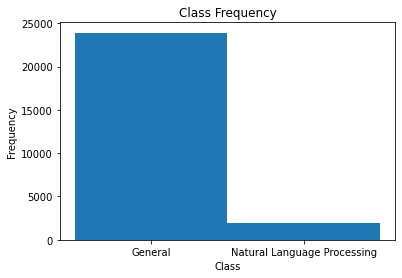

Reinforcement Learning filtered 24591 rows


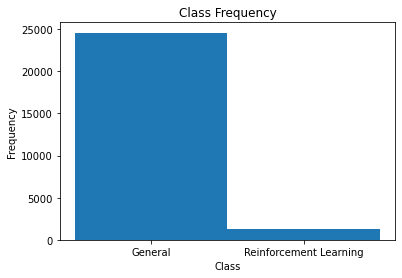

Sequential filtered 25374 rows


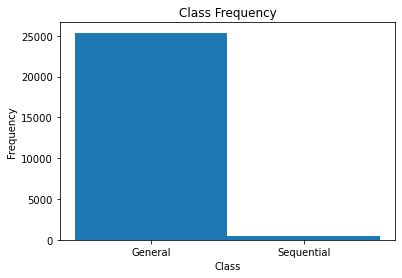

In [6]:
names_list = ["Audio", "Computer Vision", "Graphs", "Natural Language Processing", "Reinforcement Learning", "Sequential"]
#names_list = ["Graphs"]
dataframecontainers_list = [DataframeContainer(name) for name in names_list]
for container in dataframecontainers_list:
    container.filter_dataframe()
    container.separate_x_y()
    container.split_train_test()

In [7]:
for container in dataframecontainers_list:
    container.clf_fit()

Audio clf fit done
Computer Vision clf fit done
Graphs clf fit done
Natural Language Processing clf fit done
Reinforcement Learning clf fit done
Sequential clf fit done


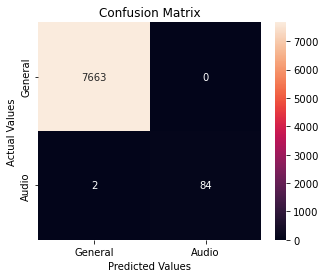

Accuracy Audio : 0.9997419021809266


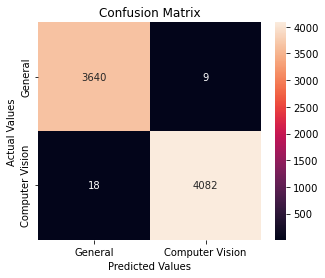

Accuracy Computer Vision : 0.9965156794425087


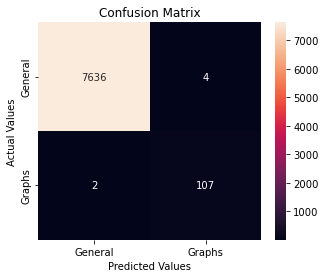

Accuracy Graphs : 0.9992257065427798


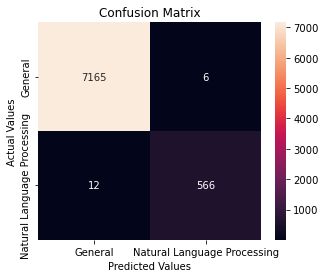

Accuracy Natural Language Processing : 0.9976771196283392


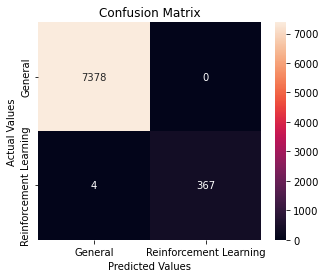

Accuracy Reinforcement Learning : 0.9994838043618531


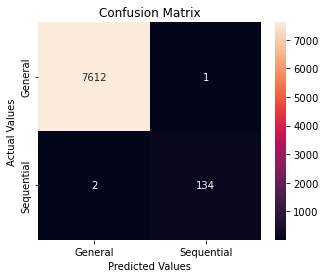

Accuracy Sequential : 0.9996128532713898


In [8]:
for container in dataframecontainers_list:
    container.predict()
    container.confusion_matrix()

In [9]:
for container in dataframecontainers_list:
    container.save_pickle()

In [10]:
def finaltest(df_train_all):
    pos = 0
    df_train_all_x = df_train_all['Text']
    for i in range(len(df_train_all_x)):
        df_train_all_x[i] = df_train_all_x[i].replace('\n', ' ').replace(',', ' ').lower()
    df_train_all_y = df_train_all['Label']
    for x in range(df_train_all_x.shape[0]):
        X = df_train_all_x.iloc[[x]]
        y = df_train_all_y.iloc[x]
        #predictions = [dataframe.clf.predict(X)[0] for dataframe in dataframecontainers_list]
        for dataframecontainer in dataframecontainers_list:
            #print(dataframecontainer.name)
            prediction = dataframecontainer.clf.predict(X)[0]
         #   p.append(prediction)
            if prediction != 'Other' and prediction == y:
                pos += 1
                break
        #print(p, y)
    print(pos/df_train_all_x.shape[0])
        
finaltest(df_train_all)

0.9984512931702029
